In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import citipy
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Create a set of rando, latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5f86684cefba064a4d9d453e1fd1a7d


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")
    
city_weather.json()

City Weather found.


{'cod': '404', 'message': 'city not found'}

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | mariental
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hambantota
Processing Record 8 of Set 1 | larap
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | neuquen
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 14 of Set 1 | narsaq
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | farah
Processing Record 17 of Set 1 | kirovskiy
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | broumov
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | flin flon
Processing R

Processing Record 36 of Set 4 | kibala
Processing Record 37 of Set 4 | westport
Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | morehead
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | ubaitaba
Processing Record 43 of Set 4 | kingaroy
Processing Record 44 of Set 4 | south lake tahoe
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | presidencia roque saenz pena
Processing Record 48 of Set 4 | bambanglipuro
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | dhidhdhoo
Processing Record 1 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 5 | karpogory
Processing Record 3 of Set 5 | belmonte
Processing Record 4 of Set 5 | ossora
Processing Record 5 of Set 5 | keita
Processing Record 6 of Set 5 | iqaluit
Processing

Processing Record 31 of Set 8 | voi
Processing Record 32 of Set 8 | rivera
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | vrnograc
Processing Record 35 of Set 8 | carutapera
Processing Record 36 of Set 8 | parry sound
Processing Record 37 of Set 8 | aras
Processing Record 38 of Set 8 | milkovo
Processing Record 39 of Set 8 | cazaje
City not found. Skipping...
Processing Record 40 of Set 8 | paamiut
Processing Record 41 of Set 8 | kant
Processing Record 42 of Set 8 | rabo de peixe
Processing Record 43 of Set 8 | yerbogachen
Processing Record 44 of Set 8 | novomalorossiyskaya
Processing Record 45 of Set 8 | tete
Processing Record 46 of Set 8 | nanfeng
Processing Record 47 of Set 8 | vysokogornyy
Processing Record 48 of Set 8 | yertsevo
Processing Record 49 of Set 8 | sisimiut
Processing Record 50 of Set 8 | kapuskasing
Processing Record 1 of Set 9 | la romana
Processing Record 2 of Set 9 | gushikawa
Processing Record 3 of Set 9 | nouadhibou
Processing Record 4

Processing Record 14 of Set 12 | artyk
City not found. Skipping...
Processing Record 15 of Set 12 | ahipara
Processing Record 16 of Set 12 | zemio
Processing Record 17 of Set 12 | pyinmana
Processing Record 18 of Set 12 | asfi
Processing Record 19 of Set 12 | ilave
Processing Record 20 of Set 12 | gejiu
Processing Record 21 of Set 12 | faanui
Processing Record 22 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 23 of Set 12 | havoysund
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | dutse
Processing Record 27 of Set 12 | ixtapa
Processing Record 28 of Set 12 | faya
Processing Record 29 of Set 12 | quelimane
Processing Record 30 of Set 12 | pacific grove
Processing Record 31 of Set 12 | westminster
Processing Record 32 of Set 12 | santa cruz del norte
Processing Record 33 of Set 12 | moerai
Processing Record 34 of Set 12 | nara
Processing Record 35 of Set 12 | matucana
Processing Record 36 of Set 12 |

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,78.31,65,36,3.47,PF,2020-12-16 04:46:52
1,Punta Arenas,-53.15,-70.92,48.20,66,0,34.45,CL,2020-12-16 04:46:52
2,Arraial Do Cabo,-22.97,-42.03,75.02,94,100,6.62,BR,2020-12-16 04:42:55
3,Hithadhoo,-0.60,73.08,81.72,71,22,10.27,MV,2020-12-16 04:46:52
4,Mariental,-24.63,17.97,75.20,14,0,2.24,NA,2020-12-16 04:46:53
5,Ushuaia,-54.80,-68.30,42.80,81,40,36.91,AR,2020-12-16 04:46:53
6,Hambantota,6.12,81.12,84.20,79,20,4.70,LK,2020-12-16 04:46:53
7,Larap,14.30,122.65,83.12,73,51,12.01,PH,2020-12-16 04:46:53
8,Tiksi,71.69,128.87,-26.68,85,45,4.52,RU,2020-12-16 04:46:54
9,Atuona,-9.80,-139.03,79.00,77,9,19.42,PF,2020-12-16 04:46:54


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-12-16 04:46:52,-23.12,-134.97,78.31,65,36,3.47
1,Punta Arenas,CL,2020-12-16 04:46:52,-53.15,-70.92,48.20,66,0,34.45
2,Arraial Do Cabo,BR,2020-12-16 04:42:55,-22.97,-42.03,75.02,94,100,6.62
3,Hithadhoo,MV,2020-12-16 04:46:52,-0.60,73.08,81.72,71,22,10.27
4,Mariental,NA,2020-12-16 04:46:53,-24.63,17.97,75.20,14,0,2.24
5,Ushuaia,AR,2020-12-16 04:46:53,-54.80,-68.30,42.80,81,40,36.91
6,Hambantota,LK,2020-12-16 04:46:53,6.12,81.12,84.20,79,20,4.70
7,Larap,PH,2020-12-16 04:46:53,14.30,122.65,83.12,73,51,12.01
8,Tiksi,RU,2020-12-16 04:46:54,71.69,128.87,-26.68,85,45,4.52
9,Atuona,PF,2020-12-16 04:46:54,-9.80,-139.03,79.00,77,9,19.42


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2020-12-16 04:46:55
Lat                         22.08
Lng                       -159.32
Max Temp                     78.8
Humidity                       78
Cloudiness                     40
Wind Speed                  11.41
Name: 13, dtype: object

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Hambantota,LK,2020-12-16 04:46:53,6.12,81.12,84.20,79,20,4.70
7,Larap,PH,2020-12-16 04:46:53,14.30,122.65,83.12,73,51,12.01
8,Tiksi,RU,2020-12-16 04:46:54,71.69,128.87,-26.68,85,45,4.52
11,Tasiilaq,GL,2020-12-16 04:46:54,65.61,-37.64,28.40,46,100,24.16
12,Narsaq,GL,2020-12-16 04:46:55,60.92,-46.05,39.20,35,60,34.45


In [32]:
# Create both the Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

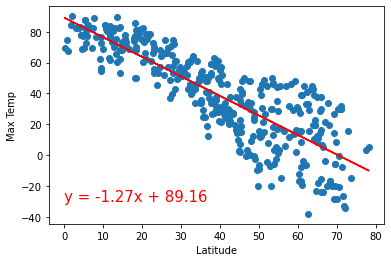

In [41]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (0,-30))

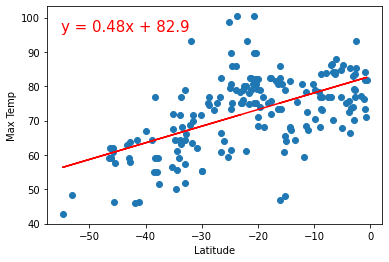

In [48]:
# Linear regression for the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp', (-55, 96))

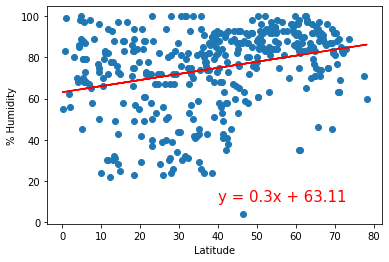

In [49]:
# Linear regression on the Northern Hemisphere for Latitude and Humidity.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,10))

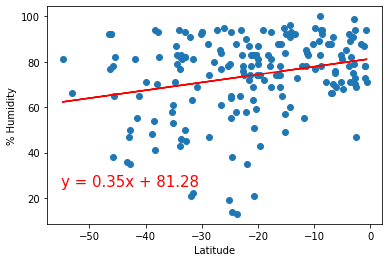

In [60]:
# Linear regression on the Southern Hemisphere for Latitude and Humidity.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55, 25))

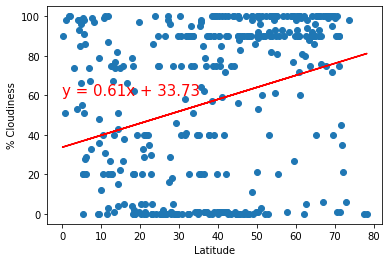

In [72]:
# Linear Regression on the Northern Hemisphere for Cloudiness and Latitudes.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (0, 60))

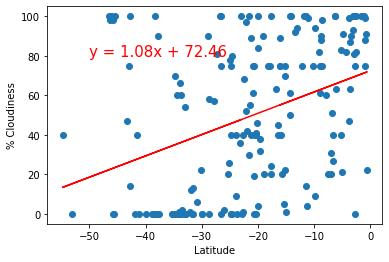

In [79]:
# Linear Regression on the Southern Hemisphere for Cloudiness and Latitudes.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50, 80))

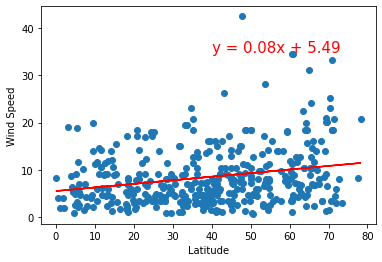

In [81]:
# Linear regression on the Northern Hemisphere for Wind Speed and Latitudes.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere for Wind Speed and Latitudes.
x_values = soutehrn_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the funstion.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wi')